# AI 2019 Project

## Imports

In [2]:
import tensorflow as tf
import tensorflow_datasets

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

version=int(tf.__version__[0])
print('TensorFlow version {}'.format(version))
assert(version == 2)

TensorFlow version 2


## Data Aquisition

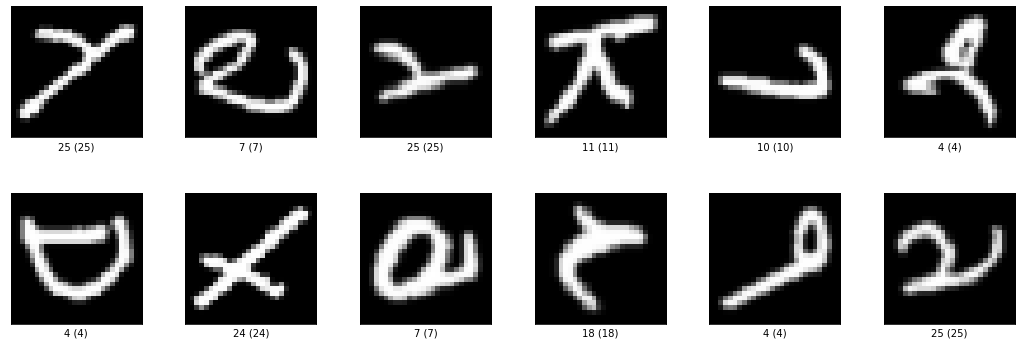

In [3]:
letters, info = tensorflow_datasets.load(name = "emnist/letters:3.0.0", with_info = True)
fig = tensorflow_datasets.show_examples(info, letters['train'], rows = 2, cols = 6)

In [35]:
print(letters['train'])

<MapDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.float16, label: tf.int64}>


## Data Preparation

In [37]:
def process(element):
    element['image']=tf.image.convert_image_dtype(element['image'], dtype=tf.float16, saturate=False)
    return element

training_set = letters['train']
training_set = training_set.prefetch(tf.data.experimental.AUTOTUNE)
training_set = training_set.map(process)
it=iter(training_set)
print(next(it)['label'])

tf.Tensor(25, shape=(), dtype=int64)


## Modelling

In [33]:
model = Sequential(
    [
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(37, activation='softmax')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [40]:
#training_set = training_set.repeat().shuffle(1024).batch(32)
model.fit(training_set.make_one_shot_iterator(), epochs=1)

AttributeError: 'BatchDataset' object has no attribute 'make_one_shot_iterator'